# Normal Mode Analysis (NMA)
### University of California, Berkeley - Spring 2024

## Analyzing the alpha-catenin vinculin complex 
### a) as a complex
### b) alpha-catenin on its own
### c ) vinculun on its own

Adapted from Lab 8 in ME120 

## [ProDy](http://prody.csb.pitt.edu/)

In [1]:
from prody import *
from pylab import *
import os

ion() # turns interactive mode on

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Gaussian Network Model (GNM) Analysis with ProDy

In [2]:
def gnm_analyze(gnm, c_alphas, name, return_nmd=True):
    gnm.buildKirchhoff(coords=c_alphas, cutoff=10.0, gamma=1.0)
    gnm.calcModes(n_modes=20, zeros=False, turbo=True)

    if not os.path.exists(name):
        os.mkdir(name)
    
    showContactMap(gnm)
    plt.savefig(f'{name}/contact_map')
    plt.show()

    showCrossCorr(gnm)
    plt.savefig(f'{name}/crosscorr_map')
    plt.show()

    showMode(gnm[0], hinges=True, zero=True)
    grid()
    plt.savefig(f'{name}/slowest_mode')
    plt.show()

    showSqFlucts(gnm[0], hinges=True)
    grid()
    plt.savefig(f'{name}/slowest_mode_sqFlucts')
    plt.show()

    showProtein(c_alphas, mode=gnm[0])
    plt.savefig(f'{name}/bipartition')
    plt.show()

    if return_nmd:
        return writeNMD(f'{name}.nmd', gnm[:3], c_alphas)

## The entrire alpha-catenin vinculin complex

In [3]:
cat_vin = parsePDB('4ehp')

# selecting all the carbon alpha atoms
c_alphas = cat_vin.select('calpha')
c_alphas2 = cat_vin.select('protein and name CA')
# confirming these two selections are the same, as expected, leading to just the backbone of the entire protein
c_alphas == c_alphas2

@> Connecting wwPDB FTP server RCSB PDB (USA).
@> 4ehp downloaded (4ehp.pdb.gz)
@> PDB download via FTP completed (1 downloaded, 0 failed).
@> 2790 atoms and 1 coordinate set(s) were parsed in 0.03s.


True

@> Kirchhoff was built in 0.01s.


@> 20 modes were calculated in 0.03s.
@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices
@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices


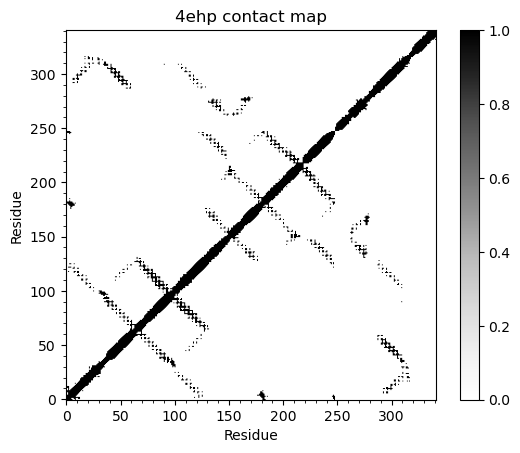

@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices
@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices


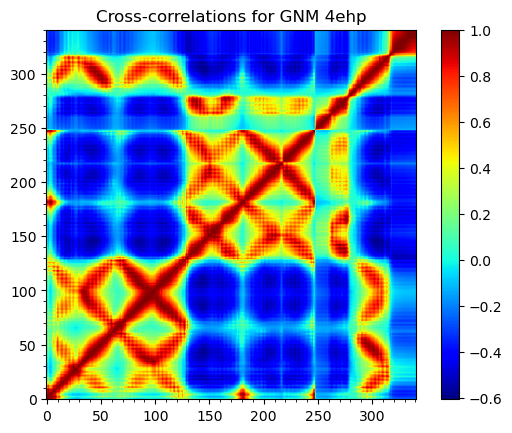

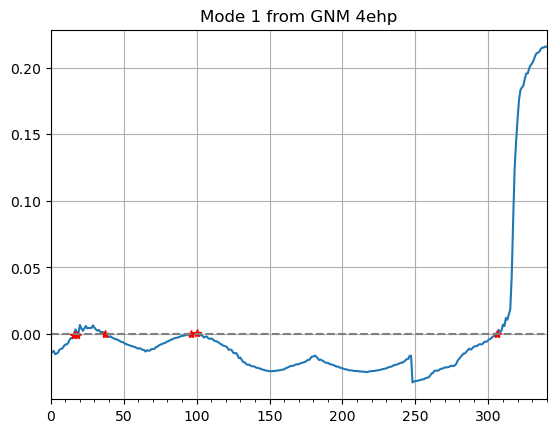

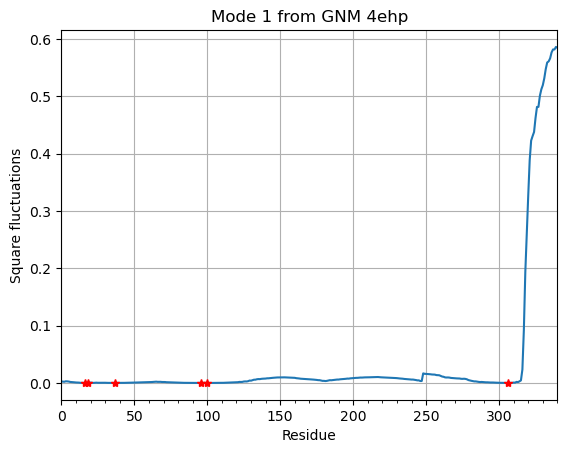

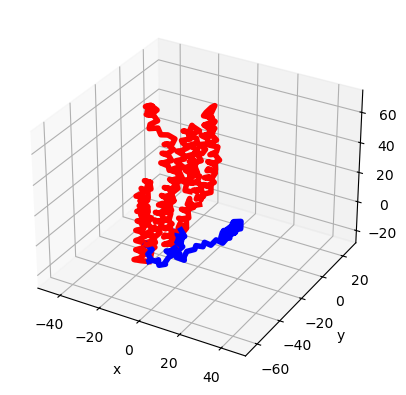

'4ehp.nmd'

In [4]:
gnm = GNM(name='4ehp')

gnm_analyze(gnm, c_alphas, '4ehp')

## Alpha-catenin

@> Kirchhoff was built in 0.00s.
@> 20 modes were calculated in 0.00s.
@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices
@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices


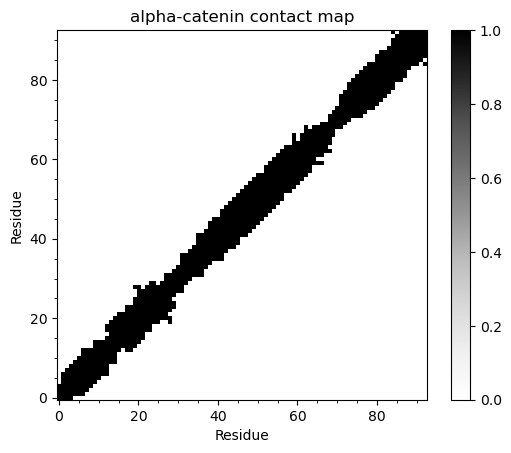

@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices
@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices


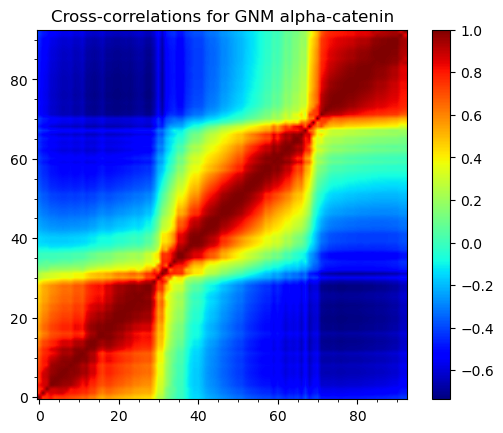

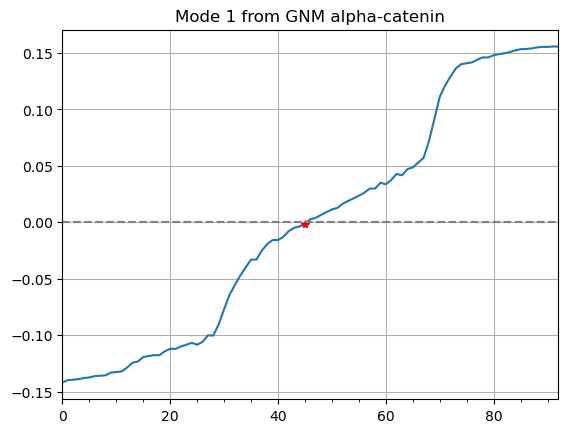

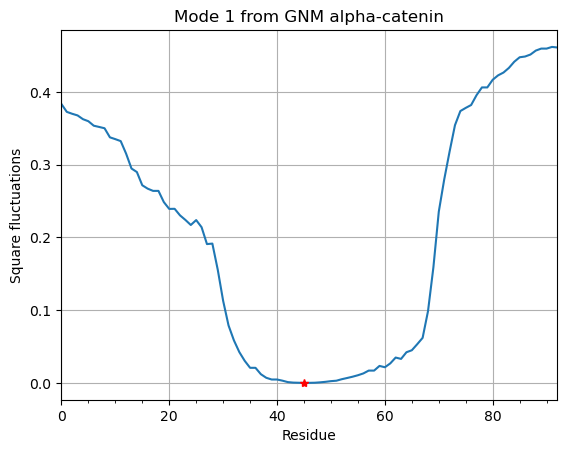

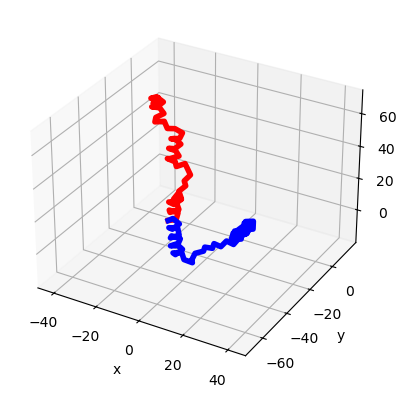

'alpha-catenin.nmd'

In [5]:
c_alphas = cat_vin.select('calpha and chain B')
gnm = GNM(name='alpha-catenin')
gnm_analyze(gnm, c_alphas, 'alpha-catenin')

## Vinculin

@> Kirchhoff was built in 0.00s.
@> 20 modes were calculated in 0.02s.
@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices
@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices


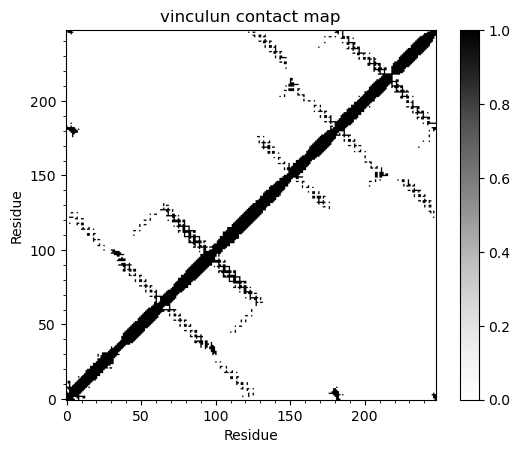

@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices
@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices


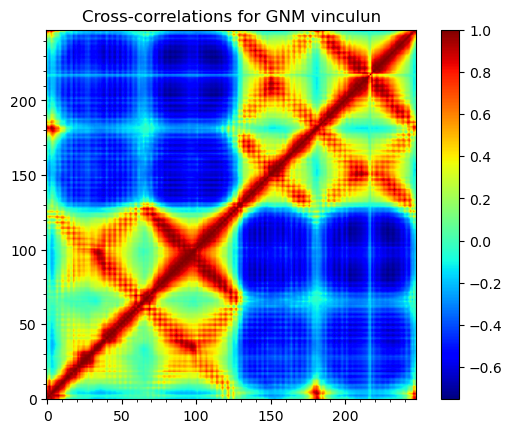

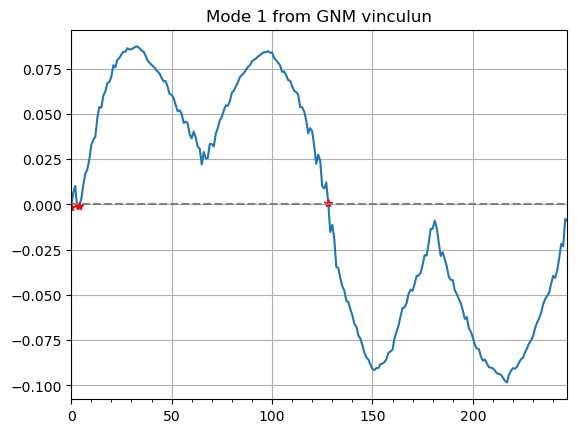

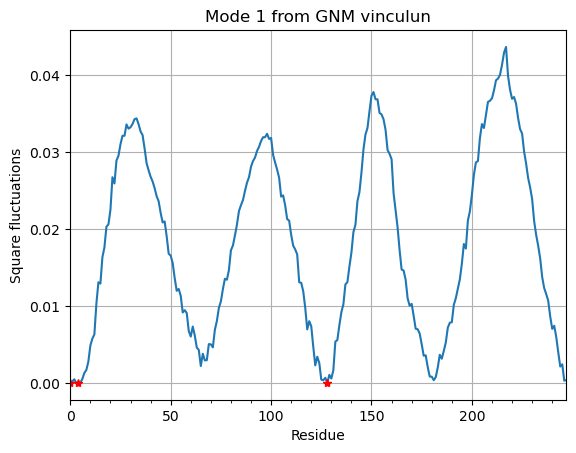

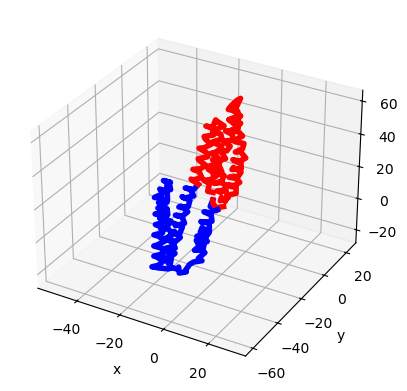

'vinculin.nmd'

In [6]:
c_alphas = cat_vin.select('calpha and chain A')
gnm = GNM(name='vinculun')
gnm_analyze(gnm, c_alphas, 'vinculin')